# Analiza danych pracy w gospodarstwie domowym
# Magdalena Cieślik
# Fizyka Techniczna
# semestr I, stopień II.

#Wstęp

Do analizy danych został wybrany zbiór **US Married Couples: Work & Household Insights**, który dostępny jest na stronie https://www.kaggle.com/datasets/utkarshx27/labor-supply-data.

Zbiór przedstawia dane, które charakteryzują pracę gospodarstwa domowego osób będących w związkach małżeńskich w Stanach Zjednoczonych.

Powodem wybrania danych jest chęć poznania powodów, kreślenia modelu oraz czynniki, które mają wpływ na pracę gospodarstwa domowego.

Zbiór zawiera wartości między innymi wiek, liczba dzieci oraz wykształcenie.

Zbiór pochodzi z Mroz, T. (1987) “The sensitivity of an empirical model of married women's hours of work to economic and statistical assumptions”, Econometrica, 55, 765-799. 1976 Panel Study of Income Dynamics.



#Opis danych

Dane zawarte w pliku *Mroz.scv* opisane zostały za pomocą 19 kolumn, gdzie każda z nich posiada 753 obserwacje. Każdy wiersz odpowiada innemu gospodarstwu domowemu. Poniżej zostały opisane zmienne oraz pochodzenie w zależności od kolumny.

1. Kolumna 1 - numeracja liczbowa.

1. work - informacja odnośnie pracy (yes/no).

2. hoursw - liczba godzin pracy żony w 1975 roku.

3. child6 - liczba dzieci powyżej 6 lat w gospodarstwie domowym.

4. child618 - liczba dzieci w wieku od 6 do 18 lat w gospodarstwie domowym.

5. agew - wiek żony (w latach).

6. educw - wykształcenie żony w latach.

7. hearnw - średnie zarobki godzinowe żony, w dolarach z 1975 roku.

8. wagew - wynagrodzenie żony podane w czasie wywiadu w 1976 r.

9. hoursh - godziny przepracowane przez męża w 1975 r.

10. ageh - wiek męża.

11. educh - wykształcenie męża w latach.

12. wageh - pensja męża, w dolarach z 1975 roku.

13. income - dochód rodziny w dolarach z 1975 roku.

14. educwm - wykształcenie matki żony, w latach.

15. educwf - wykształcenie ojca żony w latach.

16. unemprate - stopa bezrobocia w powiecie zamieszkania, w punktach procentowych.

17. city - zamieszkanie w dużym mieście (yes/no).

18. experience - rzeczywiste lata wcześniejszego doświadczenia żony na rynku pracy.

#Pobieranie danych, analiza, klasyfikacja

Pobieranie bibliotek

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Odczyt pliku *Mroz.scv*

In [125]:
data=pd.read_csv("Mroz.csv", header = 0)
data

,Unnamed: 0,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,city,experience
0,1,yes,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,12,7,5.0,no,14
1,2,yes,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,7,7,11.0,yes,5
2,3,yes,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,12,7,5.0,no,15
3,4,yes,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,7,7,5.0,no,6
4,5,yes,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,12,14,9.5,yes,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,749,no,0,0,2,40,13,0.0000,0.00,3020,43,16,9.2715,28200,10,10,9.5,yes,5
749,750,no,0,2,3,31,12,0.0000,0.00,2056,33,12,4.8638,10000,12,12,7.5,no,14
750,751,no,0,0,0,43,12,0.0000,0.00,2383,43,12,1.0898,9952,10,3,7.5,no,4
751,752,no,0,0,0,60,12,0.0000,0.00,1705,55,8,12.4400,24984,12,12,14.0,yes,15


Można zatem zauważyć, że zgodnie z wcześniejszą informacją zbiór składa się z 753 wierszy i 19 kolumn.

In [126]:
data.columns

Index(['Unnamed: 0', 'work', 'hoursw', 'child6', 'child618', 'agew', 'educw',
       'hearnw', 'wagew', 'hoursh', 'ageh', 'educh', 'wageh', 'income',
       'educwm', 'educwf', 'unemprate', 'city', 'experience'],
      dtype='object')

Sumowanie i sprawdzenie czy występują puste komórki.

In [127]:
data.isnull().sum()

Unnamed: 0    0
work          0
hoursw        0
child6        0
child618      0
agew          0
educw         0
hearnw        0
wagew         0
hoursh        0
ageh          0
educh         0
wageh         0
income        0
educwm        0
educwf        0
unemprate     0
city          0
experience    0
dtype: int64

Po sprawdzeniu można zauważyć, że nie występują puste komórki co oznacza,że nie ma potrzeby zmiany pustych komórek na wartości "0".

Sprawdzenie typu danych.

In [128]:
type(data)

pandas.core.frame.DataFrame

Data.info() zwraca informacje odnośnie liczby kolumn, wierszy w danej kolumnie, pustych wierszach oraz typie danych.

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  753 non-null    int64  
 1   work        753 non-null    object 
 2   hoursw      753 non-null    int64  
 3   child6      753 non-null    int64  
 4   child618    753 non-null    int64  
 5   agew        753 non-null    int64  
 6   educw       753 non-null    int64  
 7   hearnw      753 non-null    float64
 8   wagew       753 non-null    float64
 9   hoursh      753 non-null    int64  
 10  ageh        753 non-null    int64  
 11  educh       753 non-null    int64  
 12  wageh       753 non-null    float64
 13  income      753 non-null    int64  
 14  educwm      753 non-null    int64  
 15  educwf      753 non-null    int64  
 16  unemprate   753 non-null    float64
 17  city        753 non-null    object 
 18  experience  753 non-null    int64  
dtypes: float64(4), int64(13), obj

**int64** -  liczba całkowita

**object** - obiekt

**float64** - liczba zmiennoprzecinkowa.

data.corr znajduje korelację pomiędzy danymi

In [130]:
data.corr()

<ipython-input-130-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,experience
Unnamed: 0,1.000000,-0.638588,0.170071,0.016401,0.053285,-0.160816,-0.523809,-0.559615,0.053309,0.052089,-0.053115,0.085000,-0.037990,-0.093227,-0.020728,0.048361,-0.312350
hoursw,-0.638588,1.000000,-0.222063,-0.090632,-0.033114,0.105960,0.422944,0.606916,-0.056348,-0.031089,-0.009650,-0.098599,0.146306,0.057864,0.013671,-0.060290,0.404959
child6,0.170071,-0.222063,1.000000,0.084160,-0.433949,0.108690,-0.122895,-0.134909,0.024292,-0.442991,0.133623,0.032384,-0.027781,0.107829,0.096076,-0.009050,-0.194037
child618,0.016401,-0.090632,0.084160,1.000000,-0.385411,-0.058899,-0.047349,-0.068680,0.099378,-0.350199,0.009437,-0.029708,-0.019510,0.032383,-0.026830,0.014279,-0.299513
agew,0.053285,-0.033114,-0.433949,-0.385411,1.000000,-0.120223,-0.034559,-0.058315,-0.084372,0.888138,-0.163049,0.027015,0.052440,-0.234642,-0.160591,0.077077,0.334016
educw,-0.160816,0.105960,0.108690,-0.058899,-0.120223,1.000000,0.318378,0.267575,0.078916,-0.133522,0.611954,0.284936,0.361275,0.435336,0.442458,0.072140,0.066256
hearnw,-0.523809,0.422944,-0.122895,-0.047349,-0.034559,0.318378,1.000000,0.651641,-0.059919,-0.031836,0.126224,0.061290,0.231175,0.090305,0.098477,-0.000128,0.250580
wagew,-0.559615,0.606916,-0.134909,-0.068680,-0.058315,0.267575,0.651641,1.000000,-0.070797,-0.055399,0.106967,0.019276,0.208712,0.085598,0.102772,0.009124,0.341557
hoursh,0.053309,-0.056348,0.024292,0.099378,-0.084372,0.078916,-0.059919,-0.070797,1.000000,-0.095387,0.107845,-0.236021,0.128142,0.053354,0.050345,-0.155220,-0.099366
ageh,0.052089,-0.031089,-0.442991,-0.350199,0.888138,-0.133522,-0.031836,-0.055399,-0.095387,1.000000,-0.195323,0.019681,0.040503,-0.227457,-0.135000,0.053094,0.271910


<ipython-input-131-a0da86fce16f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap = 'RdBu', vmin = -1, vmax=1)


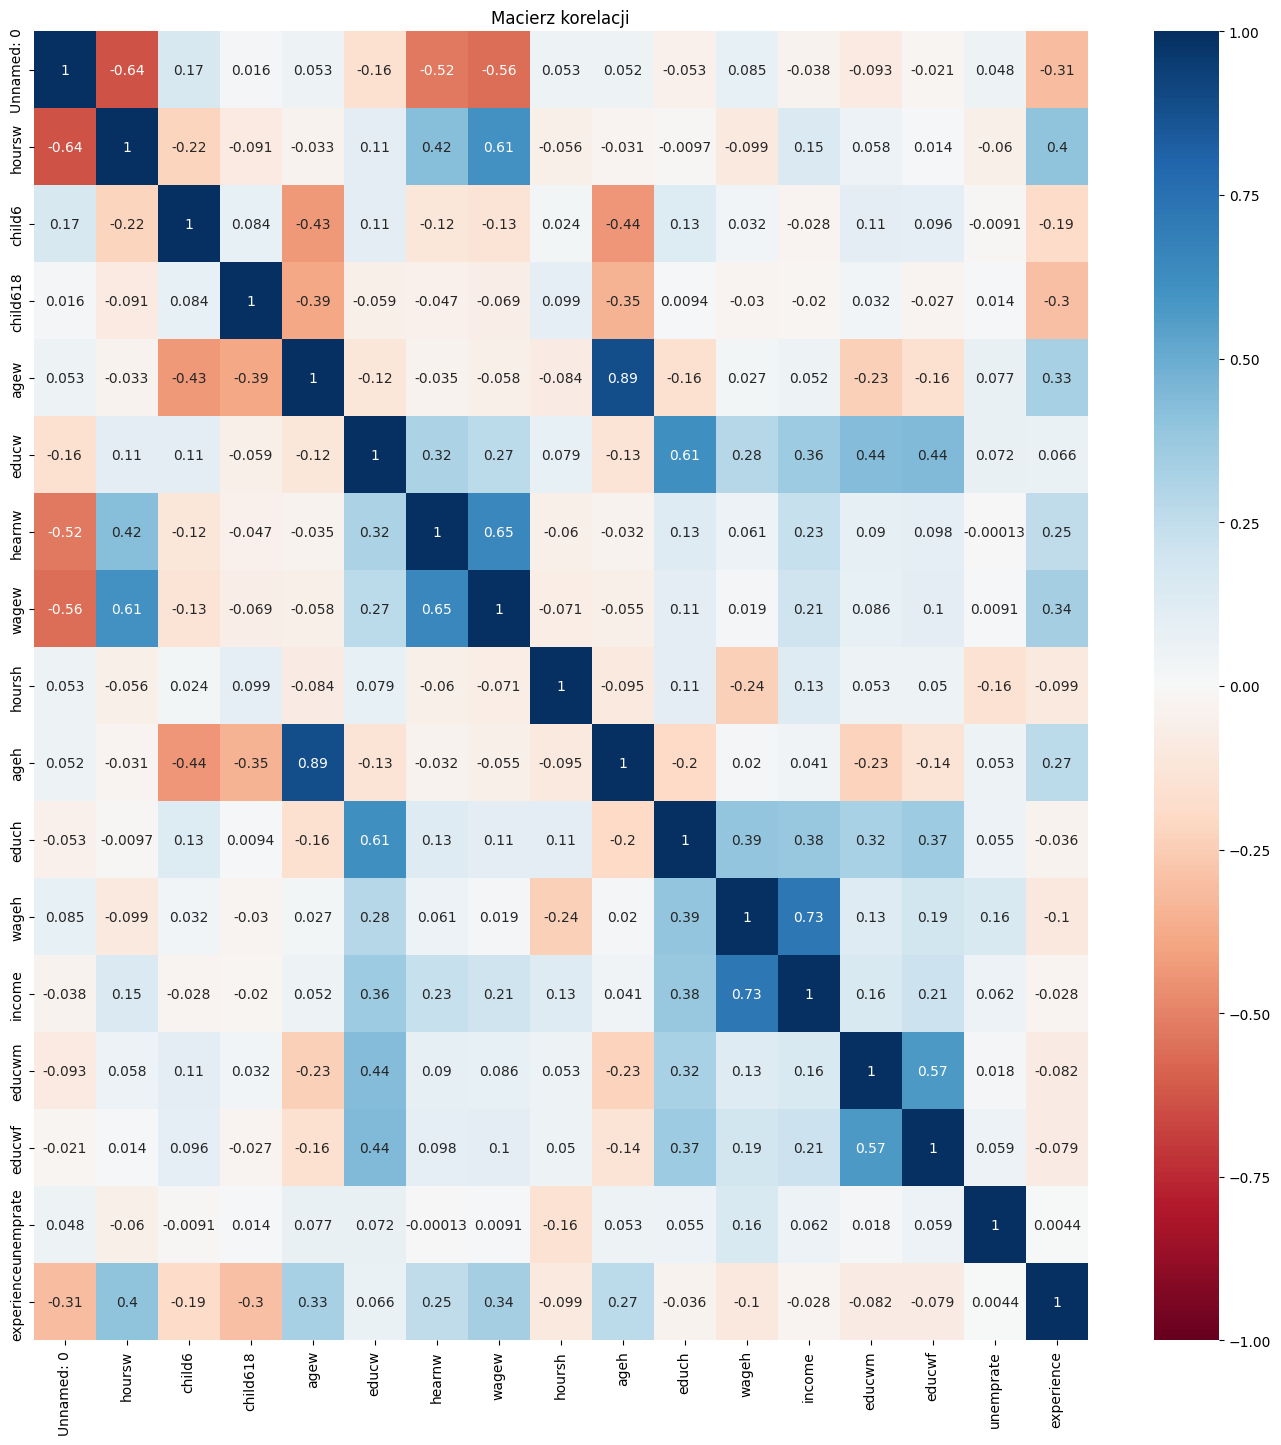

In [131]:
plt.figure(figsize=(17,17))
sns.heatmap(data.corr(),annot=True, cmap = 'RdBu', vmin = -1, vmax=1)
plt.title("Macierz korelacji")
plt.show()

data.describe().T zawiera podstawowe informacje odnośnie zbioru danych między innymi wartości minimalne czy masymalne w zbiorze. Dzięki temu można stwierdzić jak bardzo dane ze sobą korelują.

In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,753.0,377.000000,217.516666,1.0000,189.0000,377.0000,565.0000,753.000
hoursw,753.0,740.576361,871.314216,0.0000,0.0000,288.0000,1516.0000,4950.000
child6,753.0,0.237716,0.523959,0.0000,0.0000,0.0000,0.0000,3.000
child618,753.0,1.353254,1.319874,0.0000,0.0000,1.0000,2.0000,8.000
agew,753.0,42.537849,8.072574,30.0000,36.0000,43.0000,49.0000,60.000
educw,753.0,12.286853,2.280246,5.0000,12.0000,12.0000,13.0000,17.000
hearnw,753.0,2.374565,3.241829,0.0000,0.0000,1.6250,3.7879,25.000
wagew,753.0,1.849734,2.419887,0.0000,0.0000,0.0000,3.5800,9.980
hoursh,753.0,2267.270916,595.566649,175.0000,1928.0000,2164.0000,2553.0000,5010.000
ageh,753.0,45.120850,8.058793,30.0000,38.0000,46.0000,52.0000,60.000


Histogram dla kolumny 'hoursw'

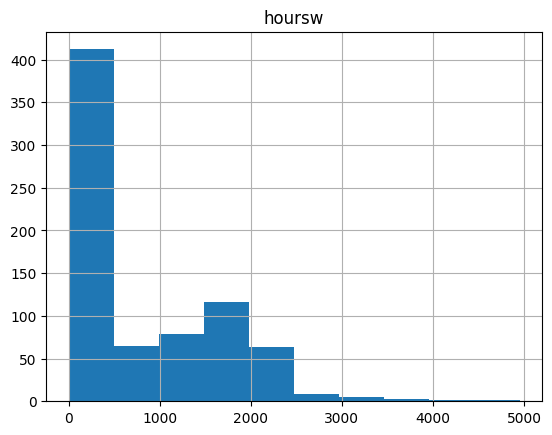

In [133]:
pd.DataFrame(data['hoursw']).hist()
plt.show()

Można zauważyć, że liczby godzin prac żony dla różnych gospodarstw domowych bardzo się od siebie różnią.

Dane zależą również od tego gdzie dana rodzina mieszka. Rozdzielone i pogrupowane zostały dane, dla których powstały tabele w zależności od odpowiedzi "yes" oraz "no".

In [134]:
data.city.value_counts()

yes    484
no     269
Name: city, dtype: int64

In [135]:
city_no = data[data.city == 'no']
city_yes = data[data.city == 'yes']

In [136]:
city_no.describe()

,Unnamed: 0,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,experience
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,376.806691,759.516729,0.267658,1.412639,41.494424,11.799257,2.090316,1.566245,2357.159851,44.390335,11.546468,5.647955,19075.223048,8.944238,8.081784,7.855019,10.509294
std,221.705650,880.953137,0.562274,1.345525,8.178339,2.284895,2.600105,2.017623,631.435199,8.264294,3.124691,3.023880,10506.876787,3.205734,3.386871,3.513219,8.464418
min,1.000000,0.000000,0.000000,0.000000,30.000000,5.000000,0.000000,0.000000,768.000000,30.000000,3.000000,0.549400,2500.000000,0.000000,0.000000,3.000000,0.000000
25%,192.000000,0.000000,0.000000,0.000000,35.000000,11.000000,0.000000,0.000000,1968.000000,37.000000,10.000000,3.684600,13000.000000,7.000000,7.000000,5.000000,3.000000
50%,383.000000,336.000000,0.000000,1.000000,41.000000,12.000000,1.666700,0.000000,2240.000000,44.000000,12.000000,5.083300,17200.000000,7.000000,7.000000,7.500000,9.000000
75%,573.000000,1599.000000,0.000000,2.000000,48.000000,12.000000,3.472200,3.000000,2670.000000,51.000000,13.000000,7.280500,22582.000000,12.000000,10.000000,11.000000,15.000000
max,751.000000,4950.000000,3.000000,8.000000,60.000000,17.000000,18.267000,9.980000,5010.000000,60.000000,17.000000,19.444000,90800.000000,17.000000,17.000000,14.000000,38.000000


In [137]:
city_yes.describe()

,Unnamed: 0,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,experience
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,377.107438,730.049587,0.221074,1.320248,43.117769,12.557851,2.532547,2.007293,2217.311983,45.526860,13.016529,8.501613,25306.721074,9.421488,9.212810,9.050620,10.698347
std,215.384612,866.647441,0.501230,1.305635,7.962683,2.234392,3.541376,2.605533,569.221247,7.921803,2.831305,4.458330,12498.294646,3.445529,3.611885,2.783235,7.848983
min,2.000000,0.000000,0.000000,0.000000,30.000000,5.000000,0.000000,0.000000,175.000000,30.000000,5.000000,0.412100,1500.000000,0.000000,0.000000,3.000000,0.000000
25%,186.500000,0.000000,0.000000,0.000000,36.000000,12.000000,0.000000,0.000000,1920.000000,39.000000,12.000000,6.005175,17243.500000,7.000000,7.000000,7.500000,5.000000
50%,366.500000,254.500000,0.000000,1.000000,44.000000,12.000000,1.600000,0.000000,2139.500000,46.000000,12.000000,7.699100,23125.000000,10.000000,7.000000,9.000000,9.000000
75%,561.250000,1487.000000,0.000000,2.000000,49.000000,14.000000,3.978700,3.777500,2500.000000,52.000000,16.000000,10.000000,30491.250000,12.000000,12.000000,11.000000,15.000000
max,753.000000,4210.000000,3.000000,7.000000,60.000000,17.000000,25.000000,9.980000,4684.000000,60.000000,17.000000,40.509000,96000.000000,17.000000,17.000000,14.000000,45.000000


In [138]:
city_yes = city_yes.iloc[:,:-1].copy()

In [139]:
city_yes

,Unnamed: 0,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,city
1,2,yes,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,7,7,11.0,yes
4,5,yes,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,12,14,9.5,yes
5,6,yes,2032,0,0,54,12,4.7421,4.70,1040,57,11,6.7106,19495,14,7,7.5,yes
13,14,yes,997,0,2,43,12,2.2668,3.50,3317,46,12,4.3413,16860,10,10,7.5,yes
14,15,yes,1848,0,1,43,10,3.6797,3.38,2024,45,17,10.8700,31431,7,7,7.5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,745,no,0,0,3,42,10,0.0000,2.75,3150,44,12,7.9365,26000,3,3,11.0,yes
745,746,no,0,2,6,39,12,0.0000,0.00,1430,34,12,2.9476,7840,7,0,9.5,yes
748,749,no,0,0,2,40,13,0.0000,0.00,3020,43,16,9.2715,28200,10,10,9.5,yes
751,752,no,0,0,0,60,12,0.0000,0.00,1705,55,8,12.4400,24984,12,12,14.0,yes


In [140]:
data.work = pd.Series(np.where(data.work.values == 'yes', 1, 0), data.index)
data.city = pd.Series(np.where(data.city.values == 'yes', 1, 0), data.index)

In [141]:
scaler = StandardScaler()
demo_scaled = scaler.fit_transform(data)

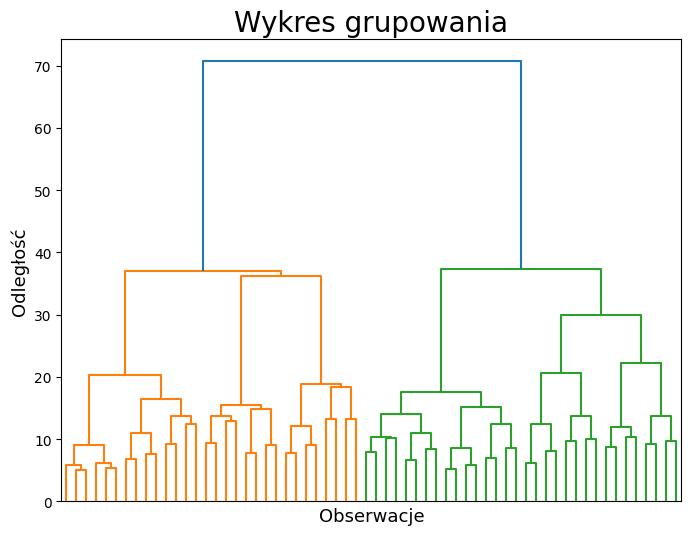

In [142]:
hier_clust = linkage(demo_scaled, method='ward')
plt.figure(figsize=(8, 6))
plt.title('Wykres grupowania', fontsize=20)
plt.ylabel('Odległość', fontsize=13)
plt.xlabel('Obserwacje', fontsize=13)
dendrogram(hier_clust, show_leaf_counts=False, truncate_mode='level', p=5, no_labels=True)
plt.show()

#Wykorzystanie metody k-średnich do klasyfikacji danych

W kilku słowach metoda k-średnich to algorytm używany w analizie skupień (klasyfikacji nienadzorowanej) w dziedzinie uczenia maszynowego. Głównym celem metody k-średnich jest podział zbioru danych na k skupień (grup) na podstawie podobieństwa między punktami danych.

Obliczenie wartości wewnętrznej sumy kwadratów (WCSS - ang. Within-Cluster Sum of Squares) dla różnych liczności skupień (k) w algorytmie k-średnich.

In [143]:
wcss = {}
for i in range(10, int(data.shape[0]/10), 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(demo_scaled)
    wcss[i] = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Po wykonaniu powyższej pętli słownik 'wcss' będzie zawierał wartości WCSS dla różnych liczności skupień. Dzięki temu można ocenić, jak dobrze model k-średnich radzi sobie z grupowaniem danych dla różnych liczności skupień.

Wygenerowanie wykresu zależności wartości WCSS od liczby klastrów (k).

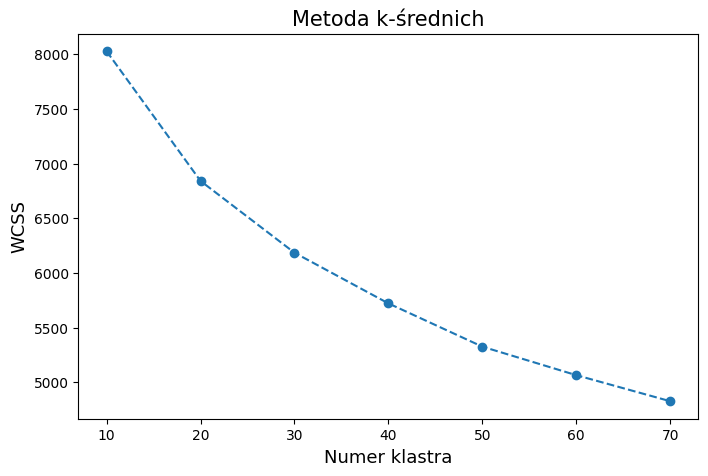

In [144]:
plt.figure(figsize=(8, 5))
plt.plot(list(wcss.keys()), list(wcss.values()), marker='o', linestyle='--')

plt.xlabel('Numer klastra', fontsize=13)
plt.ylabel('WCSS', fontsize=13)
plt.title('Metoda k-średnich', fontsize=15)
plt.show()

#Drzewa decyzyjne
Drzewo decyzyjne jest jednym z modeli uczenia maszynowego, który jest wykorzystywany zarówno do zadań klasyfikacji, jak i regresji. Jest to struktura drzewa, która reprezentuje zestaw reguł decyzyjnych, które są używane do podejmowania decyzji na podstawie danych wejściowych.  

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Tworzenie kopii danych, która jest niezależna od oryginalnego zbioru.

In [146]:
data_class_tree = data.copy()

In [147]:
y = data_class_tree.pop('work')
X = data_class_tree

Tworzony jest obiekt klasyfikatora drzewa decyzyjnego (DecisionTreeClassifier) z określonym parametrem max_depth.

max_depth jest parametrem opcjonalnym, który określa maksymalną głębokość drzewa decyzyjnego.

In [148]:
clf = DecisionTreeClassifier(max_depth=4)

Podział danych na dane testowe oraz treningowe

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Uczenie

In [150]:
clf = clf.fit(X_train, y_train)

Predykacja na zbiorze testowym

In [151]:
y_pred = clf.predict(X_test)

Wyświetlenie dokładności (accuracy) modelu klasyfikacji na podstawie przewidywanych etykiet.

In [152]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Funkcja plot_tree służy do wizualizacji struktury drzewa decyzyjnego.

In [153]:
from sklearn.tree import plot_tree

Wykres drzewa decyzyjnego

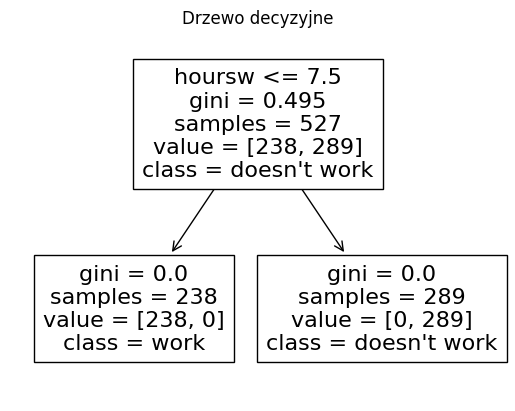

In [154]:
plot_tree(clf, feature_names=X.columns, class_names=['work', 'doesn\'t work'])
plt.title('Drzewo decyzyjne')
plt.show()

Tu pojawia się problem, bo dość łatwo biorąc pod uwagę dataset określić, czy ktoś pracuje na przykład przez wynagrodzenie. Zmieniam to na "miasto".

In [155]:
data_class_tree = data.copy()

In [156]:
y = data_class_tree.pop('city')
X = data_class_tree

In [157]:
clf = DecisionTreeClassifier(max_depth=4, splitter='best', criterion='gini', random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [158]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7433628318584071


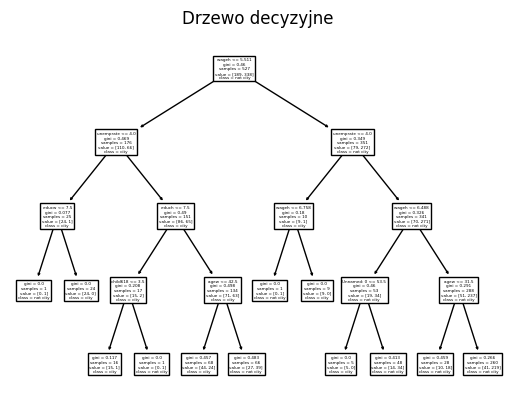

In [159]:
plot_tree(clf, feature_names=X.columns, class_names=['city', 'not city'])
plt.title('Drzewo decyzyjne')
plt.show()

In [160]:
from copy import deepcopy

Funkcja deepcopy służy do tworzenia głębokiej kopii obiektów. Głębokie kopiowanie oznacza, że tworzona jest zupełnie nowa kopia obiektu, wraz z jego wszystkimi zagnieżdżonymi obiektami.

In [161]:
data_class_tree = data.copy()

In [162]:
y = data_class_tree.pop('city')
X = data_class_tree

Twzorzenie obiektu klasyfikatora drzewa decyzyjnego z parametrami.

In [163]:
clf = DecisionTreeClassifier(max_depth=4, splitter='best', criterion='gini')

In [164]:
accuracy = 0
best_clf = None

In [165]:
for i in range(0, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    current_accuracy = metrics.accuracy_score(y_test, y_pred)
    if current_accuracy > accuracy:
        accuracy = current_accuracy
        best_clf = deepcopy(clf)

Po zakończeniu pętli, zmienna accuracy przechowuje wartość najlepszej dokładności osiągniętej w trakcie iteracji, a zmienna best_clf przechowuje najlepszy znaleziony klasyfikator, który osiągnął tę dokładność.

In [166]:
accuracy

0.7566371681415929

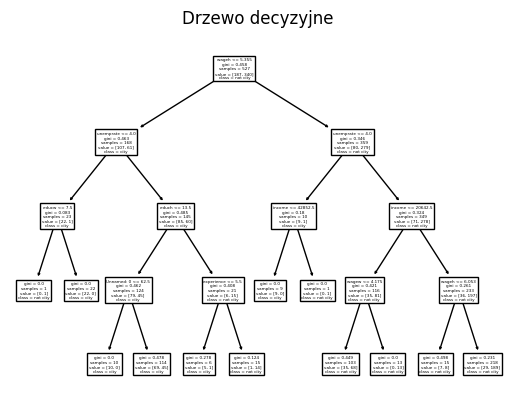

In [167]:
plot_tree(best_clf, feature_names=X.columns, class_names=['city', 'not city'])
plt.title('Drzewo decyzyjne')
plt.show()

In [168]:
from dtreeviz import model as dtreemodel

viz = dtreemodel(best_clf, X, y,
                 target_name="city",
                 feature_names=X.columns)

viz.view().show()

ModuleNotFoundError: ignored

Tutaj w google colabs w wersji bezpłatnej nie działa dtreemodel, ponieważ nie ma dostępu do terminala gdzie wystarczyłoby pobrać pip install -q dtreeviz. Przedstawiam w formie zdjęcia. We wnioskach będzie to nazywane jako rys. 1.

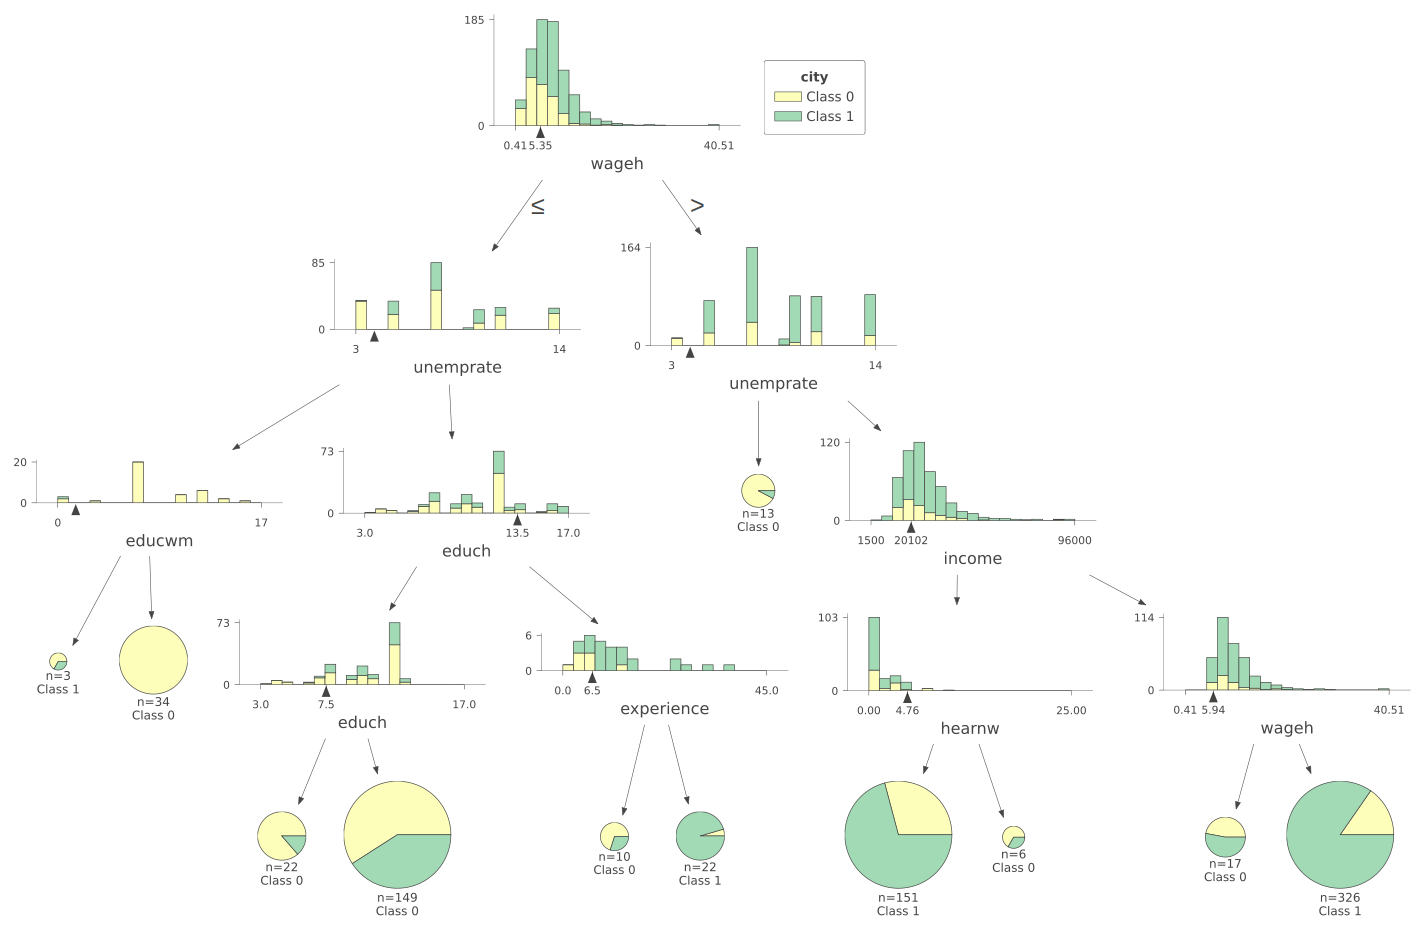

Zbiór testowy
      Unnamed: 0  work  hoursw  child6  child618  agew  educw  wagew  hoursh  \
597         598     0       0       0         0    60     11    0.0    2071   

     ageh  educh   wageh  income  educwm  educwf  unemprate  city  experience  
597    52     11  8.9329   18500       7       7        7.5     1          45  
Predykcje: [0.]


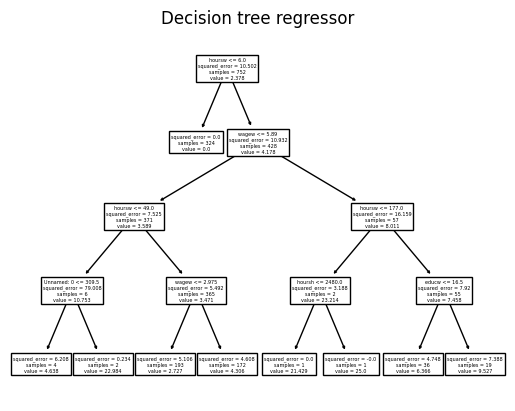

NameError: ignored

In [169]:
from sklearn.tree import DecisionTreeRegressor

data_regression_tree = data.copy()

y = data_regression_tree.pop('hearnw')
X = data_regression_tree

regressor = DecisionTreeRegressor(max_depth=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

print('Zbiór testowy\n', X_test)
print('Predykcje:', predictions)

plot_tree(regressor, feature_names=X.columns)
plt.title('Decision tree regressor')
plt.show()


viz = dtreemodel(regressor, X, y,
                 target_name="hearnw",
                 feature_names=X.columns)

viz.view().show()

Tutaj dla regresji, ponieważ sytuacja jest taka sama. We wnioskach będzie to nazywane rys. 2.

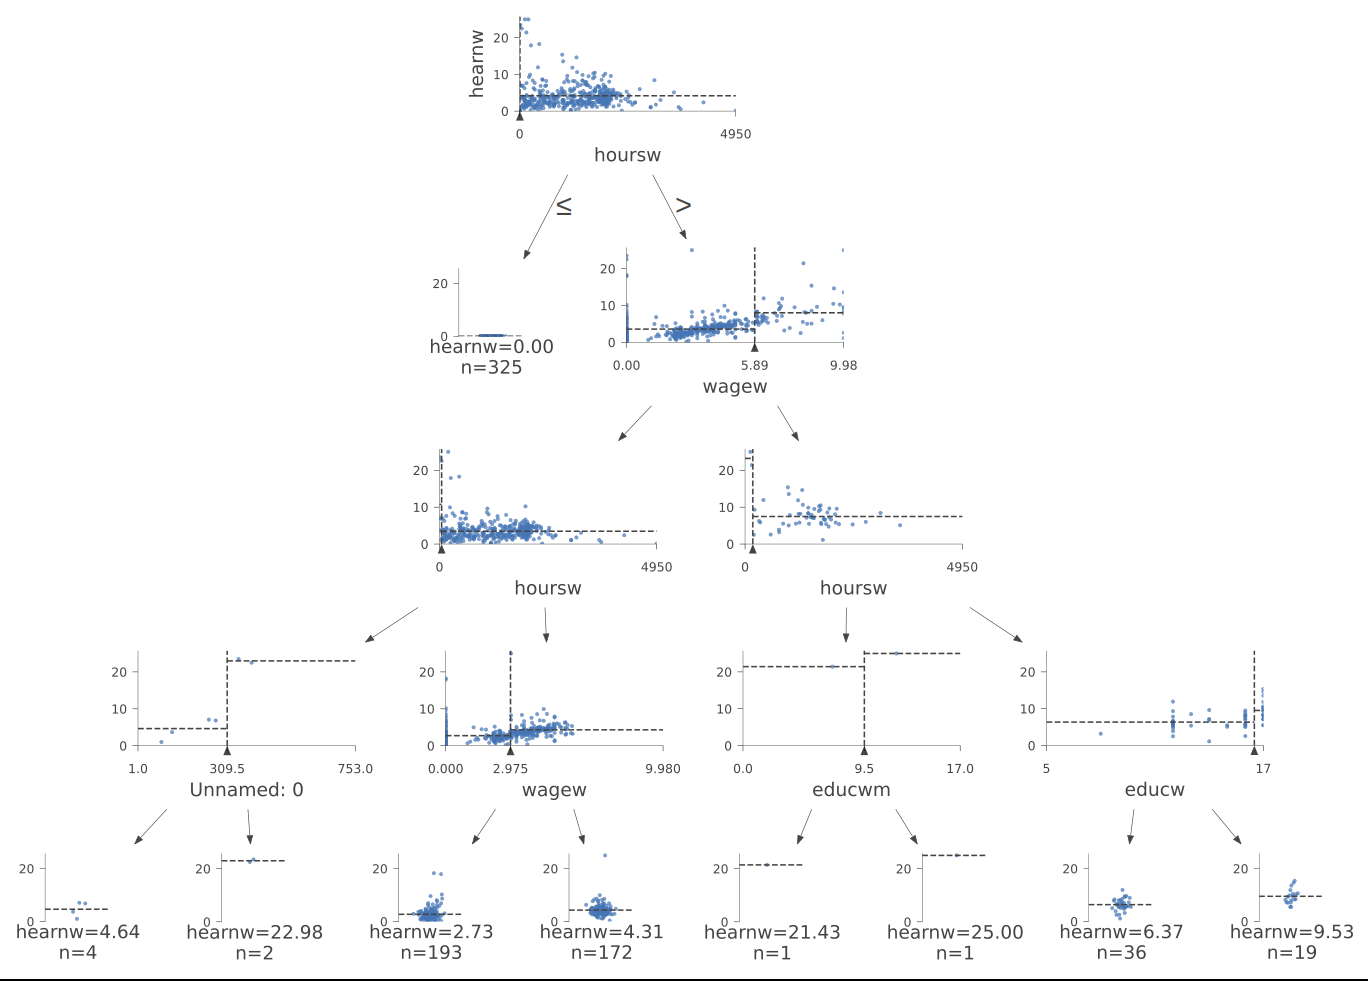

#Rezultaty, wnioski i ich dyskusja

Po przeprowadzonej analizie danych, klasyfikacji, algorytmu k-średnich, drzew decyzyjnych oraz regresji można zauważyć następujące zależności.

Kolumna 'hoursw' została wybrana jako kolumna rezprezentatywna - najbardziej określająca pracę w gospodarswie domowym, ponieważ miała jeden z lepszych współczynników korelacji między danymi.

Ze względu na to, że dane zawierały 17 kolumn wyniki korelacji pomiędzy nimi potrafiły się bardzo różnić, na przykład kolumna określająca wiek żony 'agew' oraz 'educwf' oznaczające wykształcenie ojca żony w latach. Oznacza to, że dane nie mają ze sobą korelacji jeśli chodzi o analizę pracy w gospodarstwie domowym. Nie należy ich ze sobą rozpatrywać.

Mając taki zakres danych wykres grupowania pokazuje jak bardzo dane mogą zostać pogrupowane (liczba różnych podgrup). Oznacza to ogólnie dobrą korelację między nimi.

Dane również można pogrupować ze względu czy dana rodzina mieszka w mieście czy nie. Jest to na tyle istotne, że zarobki potrfaią się kilkukrotnie różnić względem siebie. Dla kolumny danych 'yes' najważniejszą kolumną jest liczba godzin przepracowanych przez męża. Natomiast dla 'no' jest dochód rodziny.

Histogram godzin pracy przepracowanych przez męża pokazuje jak rozkład danych pomiędzy największą a najmniejszą daną może być rozłożony. Pokazuje on, że mężczyźni pracują najczęściej od 0 do około 500 godzin.

Porównując ze sobą algorytm k-średnich, drzewa decyzyjne oraz regresję można zauważyć, że najważniejszymi elementami, które mają wpływ na pracę w gospodarstwie domowym określając 'hoursw' jako najważniejszy są to między innymi 'wagew' - wynagrodzenie żony oraz stopa bezrobocia w danym regionie 'undemprate'.

Liczba godzin przepracowanych w różnych gospdarstwach domowych zawsze będzie zależała od kilku czynników, które zmieniają się w zależności od regionu, wieku, liczby dzieci czy chociażby samego zaangażowania osób, które trudno się ocenia w sposób obiektywny.